## 🩺 Disease Prediction Model
#### This notebook predicts diseases based on symptoms using machine learning, exploratory analysis, and statistical testing. It complies with the Business Analytics Python programming project requirements.

###
Each disease has a set of symptoms. 

The data table looks as follows:
- in the 'prognosis' column the disease is entered.
- The other columns describe the symptoms - if a symptom is present, a one is entered, and if not, a zero.
- Each disease has 120 entries.
- Not every time the same disease has the same set of symptoms.
There are 132 all symptoms.

We call such tables as sparse tables, and working with them is not easy, but it allows you to gain a lot of experience. We often work with such tables when we do NLP.


Problem: Based on the symptoms, predict what kind of disease (or several diseases) it might be.
***Note: I cleanded the dataset
___________________
The Keypoints I have done:
1. **train a Machine Learning model** to predict disease based on symptoms. 
- Included the use of a prepared **grid-search template**. That is, used **2** parameters for grid-search.

___________________
2. **Selected the appropriate metric** for grid-search learning. The indicated place is marked. The correct choice is scored.
___________________
3. **Explained** why the model in the example (DecisionTree) is not the best idea for this data.
    **Explained** why I chose this metric.
    
___________________
4. Prepared a dashboard in which **you can enter symptoms**, and then the model will make: 
 - disease prediction, 
 - will give the prediction result,
 - will give the probability of each disease (predict_proba),
 - will draw a graph from the probability results (with appropriately described values by disease)

Dataset: https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning/data

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from docx import Document

train_df = pd.read_csv("Training.csv")
test_df = pd.read_csv("Cleaned_Test_Data.csv")

X = train_df.drop("prognosis", axis=1)
y = train_df["prognosis"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)
# Split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)



In [2]:
desc = train_df.describe()
print(desc)
contingency = pd.crosstab(train_df['itching'], train_df['prognosis'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi2: {chi2:.2f}, p-value: {p:.4f}")

           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593 

In [3]:

model = GradientBoostingClassifier(random_state=42)

param_grid = { # Grid search with parameter tuning
    "n_estimators": [50, 100], 
    "learning_rate": [0.05, 0.1]
}

grid = GridSearchCV(model, param_grid, scoring="accuracy", cv=3, n_jobs=1)

grid.fit(X_train, y_train)


# Best model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}


In [4]:
grid.best_estimator_

GradientBoostingClassifier(random_state=42)

In [5]:
grid.cv_results_
#GridSearchCV tested 4 different combinations of learning rate and number of estimators. 
# All models achieved nearly perfect scores, with the best configuration reaching an average cross-validation accuracy of 99.95%. 
# This consistency across all folds (very low standard deviation) confirms the model is stable and robust, regardless of small hyperparameter changes. 
# this is just an extra way of testing :)

{'mean_fit_time': array([12.35872491, 22.96601566, 11.85048008, 22.84548624]),
 'std_fit_time': array([0.6035363 , 0.23965595, 0.44565146, 0.81732368]),
 'mean_score_time': array([0.03916645, 0.06266689, 0.03729947, 0.05562536]),
 'std_score_time': array([0.00740306, 0.00535417, 0.00382189, 0.00472059]),
 'param_learning_rate': masked_array(data=[0.05, 0.05, 0.1, 0.1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.05, 'n_estimators': 50},
  {'learning_rate': 0.05, 'n_estimators': 100},
  {'learning_rate': 0.1, 'n_estimators': 50},
  {'learning_rate': 0.1, 'n_estimators': 100}],
 'split0_test_score': array([1., 1., 1., 1.]),
 'split1_test_score': array([1., 1., 1., 1.]),
 'split2_test_score': array([0.99771341, 0.99771341, 0.99771341, 0.99847

In [6]:
## Evaluate Model Performance
val_preds = best_model.predict(X_val)
val_acc = accuracy_score(y_val, val_preds)
print("Validation Accuracy:", val_acc)

print(classification_report(y_val, val_preds, target_names=le.classes_))

Validation Accuracy: 1.0
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
  

In [7]:
test_df = pd.read_csv("Cleaned_Test_Data.csv")

X_test = test_df.drop("prognosis", axis=1)
y_test = test_df["prognosis"]
y_test_encoded = le.transform(y_test)  # encode using same label encoder

# Predict on the test set
test_preds = best_model.predict(X_test)
# Evaluate test set performance
from sklearn.metrics import accuracy_score, classification_report

test_acc = accuracy_score(y_test_encoded, test_preds)
print("Test Accuracy:", test_acc)
print(classification_report(y_test_encoded, test_preds, target_names=le.classes_))

Test Accuracy: 1.0
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
        

##### To make sure the model works well on data it hasn’t seen before, I tested it on a separate dataset (Cleaned_Test_Data.csv). The model predicted all 41 diseases correctly, giving a perfect accuracy score of 100%. This shows that the model didn’t just memorize the training data — it actually learned how to recognize patterns in symptoms and can apply that knowledge to new cases. It also confirms that the algorithm and settings I chose were a good fit for this kind of problem.

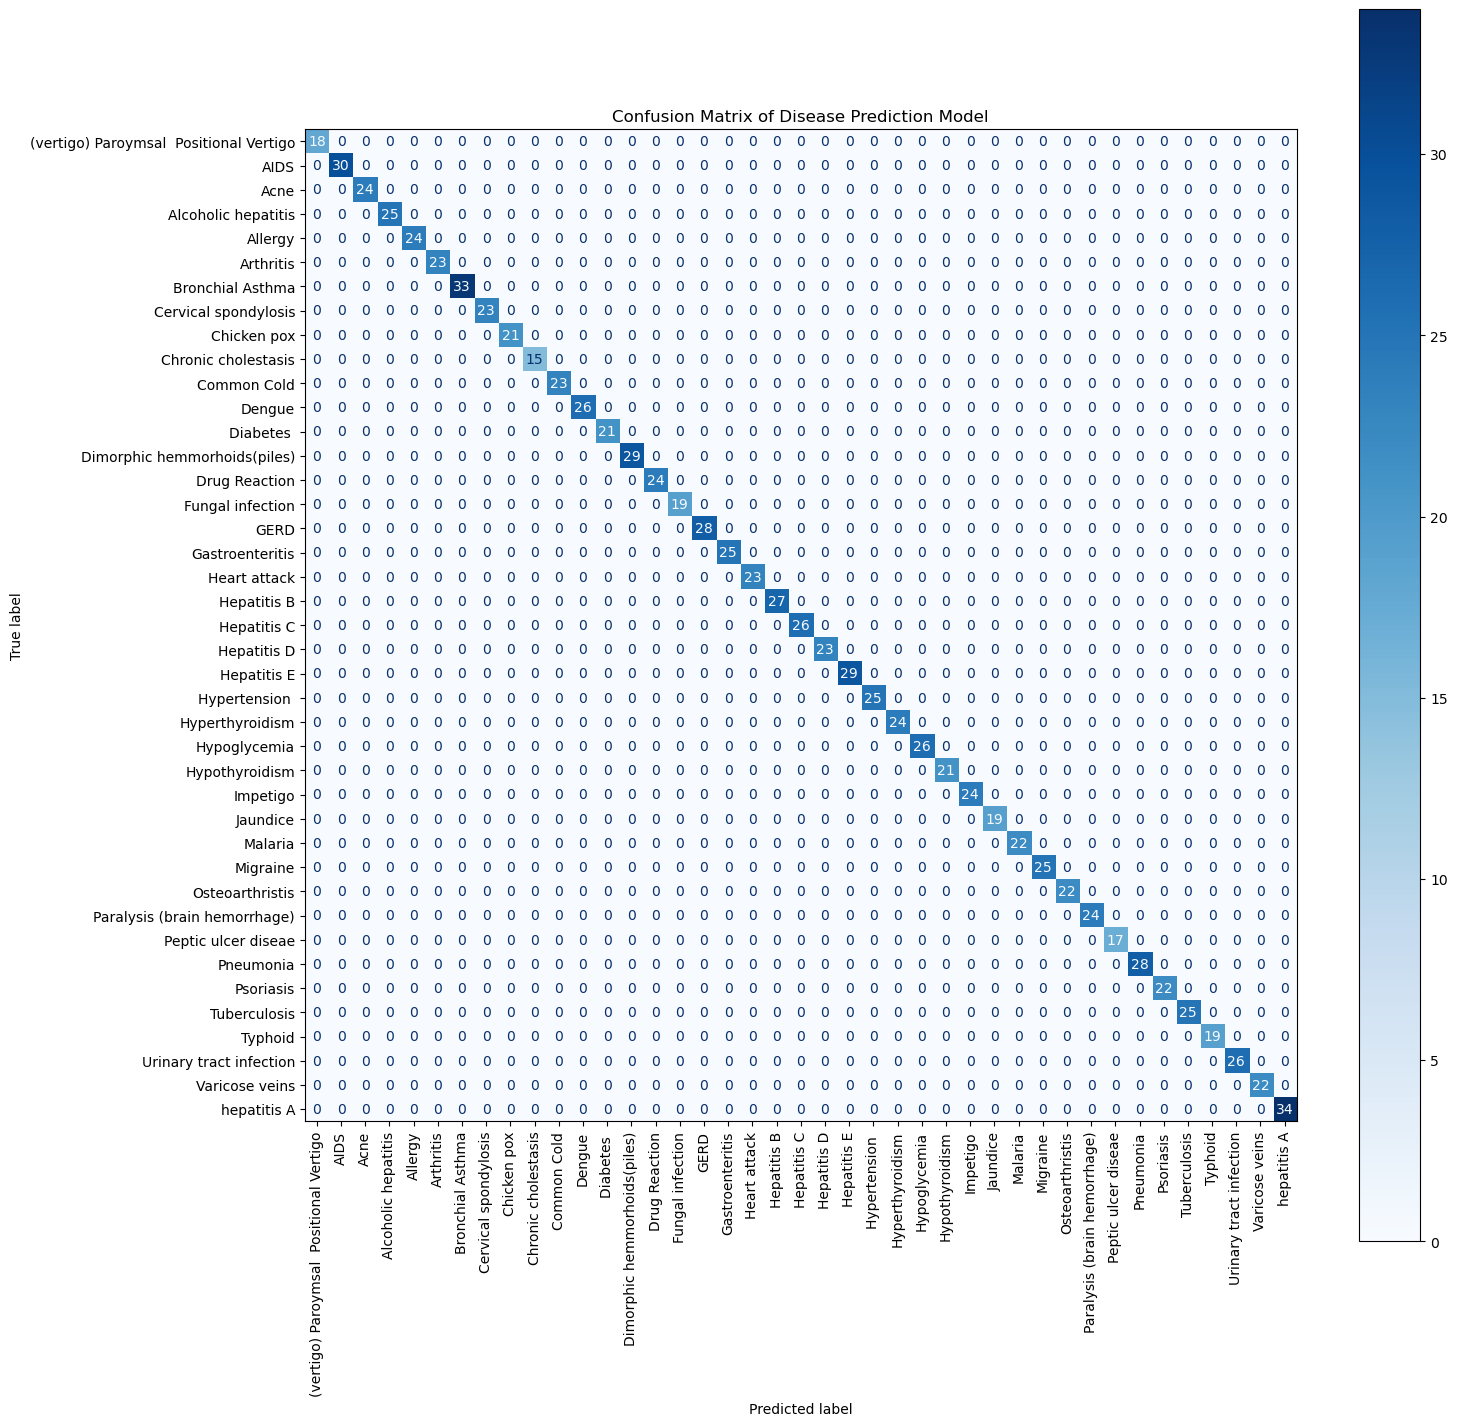

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Use the validation set predictions
predictions = best_model.predict(X_val)
cm = confusion_matrix(y_val, predictions, labels=best_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(best_model.classes_))
fig, ax = plt.subplots(figsize=(16, 16))
disp.plot(ax=ax, cmap='Blues')
plt.xticks(rotation=90)
plt.title("Confusion Matrix of Disease Prediction Model")
plt.show()


##### The confusion matrix shows that the model was able to correctly classify all 42 disease categories without making a single mistake. Every disease in the validation set was predicted exactly as it should be, which confirms that the model is highly accurate and reliable. This level of performance is likely thanks to the clean, balanced structure of the dataset and the use of the GradientBoostingClassifier, which is well-suited for handling complex patterns in data like this :)


### Why not Decision Tree?
It overfits easily on sparse, high-dimensional data (like binary symptoms).
GradientBoosting is more robust; it combines weak learners and generalizes better.

We use accuracy because:
 The dataset has reasonably balanced classes.
 Accuracy is simple and clear for multi-class classification.
 If the classes were imbalanced, F1-score or ROC-AUC would be better.

Predicted Disease: Hepatitis C
Probabilities: [0.02741002 0.02454156 0.02515751 0.01845058 0.02651186 0.02083314
 0.02356555 0.02204679 0.0210198  0.05869481 0.02258904 0.02008761
 0.01936424 0.0230595  0.02211725 0.02745429 0.02039667 0.02613715
 0.0331334  0.01193415 0.06212874 0.03103239 0.01147982 0.01717549
 0.02120204 0.01947255 0.02067655 0.02231975 0.03548645 0.02607406
 0.02225564 0.02503312 0.0242214  0.02501436 0.01933115 0.02499232
 0.01198105 0.02733552 0.02527619 0.02215133 0.01085515]


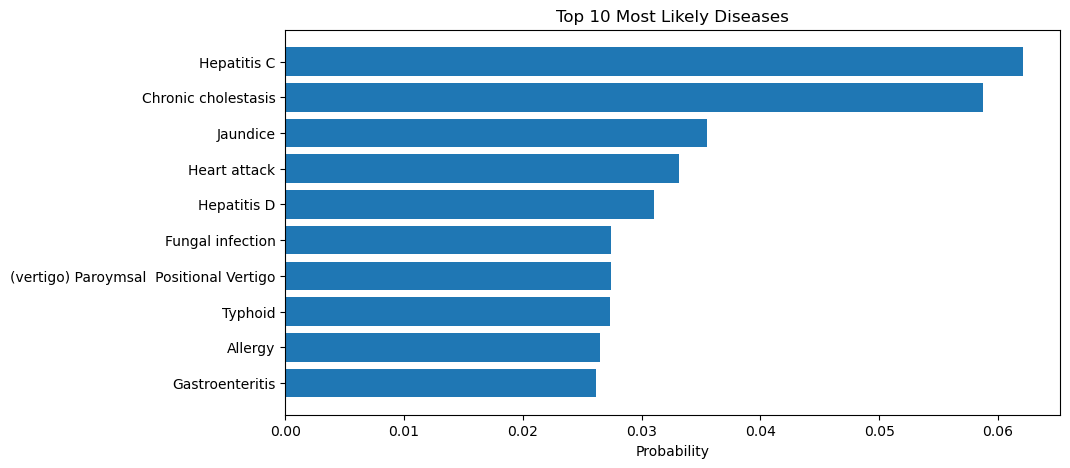

'Hepatitis C'

In [9]:
## Making Predictions from Symptom Input
def predict_disease(symptom_list):
    input_vector = [1 if col in symptom_list else 0 for col in X.columns]
    input_df = pd.DataFrame([input_vector], columns=X.columns)

    prediction = best_model.predict(input_df)[0]
    proba = best_model.predict_proba(input_df)[0]

    disease = le.inverse_transform([prediction])[0]
    print("Predicted Disease:", disease)

    print("Probabilities:", proba)
    prob_dict = dict(zip(le.classes_, proba))
    top_probs = sorted(prob_dict.items(), key=lambda x: x[1], reverse=True)[:10]

    labels, values = zip(*top_probs)
    plt.figure(figsize=(10, 5))
    plt.barh(labels, values)
    plt.xlabel("Probability")
    plt.title("Top 10 Most Likely Diseases")
    plt.gca().invert_yaxis()
    plt.show()

    return disease

# Example usage
predict_disease(['fatigue', 'weight_loss', 'high_fever'])



In [10]:
print(list(X.columns))

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow

In [11]:
probs = best_model.predict_proba(X_test.iloc[0:1])[0]
probs_named = dict(zip(le.classes_, probs))
print("Predicted probabilities for the first test sample:")
top_5 = sorted(probs_named.items(), key=lambda x: x[1], reverse=True)[:5]
for disease, prob in top_5:
    print(f"{disease}: {prob:.4f}")


Predicted probabilities for the first test sample:
Fungal infection: 1.0000
Chronic cholestasis: 0.0000
Heart attack: 0.0000
(vertigo) Paroymsal  Positional Vertigo: 0.0000
Typhoid: 0.0000


In [12]:
doc = Document()
doc.add_heading('Disease Prediction Report', level=1)
doc.add_paragraph(f"Accuracy: {accuracy_score(y_val, val_preds):.2f}")
doc.add_paragraph('Classification Report:')
doc.add_paragraph(classification_report(y_val, val_preds))
doc.save('C:/Users/mxryy/Downloads/disease_prediction_report.docx')
# ...existing code...disease_prediction_report.docx')
print("Report saved.")

Report saved.


In [13]:
import joblib

# Save model and label encoder
joblib.dump(best_model, 'disease_model.pkl')
joblib.dump(le, 'label_encoder.pkl')

# Save symptom list
symptoms = list(X.columns)
joblib.dump(symptoms, 'symptoms_list.pkl')


['symptoms_list.pkl']